In [1]:
import pygrank
import networkx
import fairbench as fb

The default pygrank backend has been set to "numpy" by the file C:\Users\manio\.pygrank\config.json
Set your preferred backend as one of ["numpy", "pytorch", "tensorflow", "torch_sparse", "matvec", "sparse_dot_mkl"] and "reminder": false in that file to remove this message from future runs.


## Load data

In [2]:
_, graph, communities = next(pygrank.load_datasets_multiple_communities(["highschool"], graph_api=networkx))
print(graph, " "*20)

REQUIRED CITATION: Please visit the url http://www.sociopatterns.org/datasets/high-school-contact-and-friendship-networks for instructions on how to cite the dataset highschool in your research


Graph with 156 nodes and 1437 edges                     


In [3]:
seeds = pygrank.to_signal(graph, communities[0]) # 2BIO1 class
sensitive = pygrank.to_signal(graph, communities[1]) # females
train, test = pygrank.split(seeds, 0.8)
dict(test)  # what graph signals look like

{'1': 0.0,
 '883': 0.0,
 '132': 0.0,
 '339': 0.0,
 '653': 0.0,
 '545': 0.0,
 '171': 0.0,
 '117': 0.0,
 '196': 0.0,
 '587': 0.0,
 '372': 0.0,
 '147': 0.0,
 '55': 0.0,
 '859': 0.0,
 '106': 0.0,
 '504': 0.0,
 '471': 1.0,
 '425': 0.0,
 '170': 0.0,
 '939': 0.0,
 '272': 0.0,
 '3': 0.0,
 '119': 0.0,
 '494': 0.0,
 '205': 0.0,
 '265': 0.0,
 '779': 0.0,
 '364': 0.0,
 '240': 0.0,
 '477': 0.0,
 '101': 0.0,
 '884': 0.0,
 '441': 0.0,
 '9': 0.0,
 '1594': 0.0,
 '488': 0.0,
 '190': 0.0,
 '325': 0.0,
 '14': 0.0,
 '232': 0.0,
 '520': 0.0,
 '65': 0.0,
 '605': 0.0,
 '621': 0.0,
 '20': 0.0,
 '387': 0.0,
 '615': 0.0,
 '151': 0.0,
 '977': 0.0,
 '1232': 0.0,
 '513': 0.0,
 '634': 0.0,
 '156': 0.0,
 '691': 0.0,
 '34': 0.0,
 '1870': 0.0,
 '869': 0.0,
 '452': 0.0,
 '866': 0.0,
 '1332': 0.0,
 '502': 0.0,
 '454': 0.0,
 '201': 0.0,
 '245': 0.0,
 '687': 0.0,
 '582': 0.0,
 '642': 0.0,
 '564': 0.0,
 '1401': 0.0,
 '753': 0.0,
 '38': 0.0,
 '159': 0.0,
 '577': 0.0,
 '857': 0.0,
 '124': 0.0,
 '725': 0.0,
 '274': 0.0,
 '871'

In [4]:
test.np  # internal array representation

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [5]:
test.filter(exclude=train)  # the array representation without elements for which train==1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0.])

## Run a node ranking algorithm

In [6]:
algorithm = pygrank.PageRank(alpha=0.85)
predictions = algorithm(train)
predictions = predictions*(1-train) >> pygrank.Top(20)  # set training scores to zero to not suggest them in the top20
print(f"Positive train {train.np.sum():.0f}")
print(f"Positive preds {predictions.np.sum():.0f}")

Positive train 13
Positive preds 20


In [7]:
test_labels = test.filter(exclude=train)
test_preds = predictions.filter(exclude=train)
test_sensitive = sensitive.filter(exclude=train)
test_sensitive = fb.Fork(sensitive=fb.categories@test_sensitive)
test_sensitive.sum()

sensitive0.0,81
sensitive1.0,62


In [8]:
report = fb.multireport(labels=test_labels, predictions=test_preds, sensitive=test_sensitive)
report

accuracy,0.7580645161290323
pr,0.06172839506172839
tpr,0.0
tnr,0.9574468085106383
accuracy,0.8079371816638371
pr,0.2551440329218107
tpr,0.0
tnr,0.9574468085106383
accuracy,0.1802070888092393
pr,0.18020708880923936
tpr,0.13333333333333333


## Run a fairness-aware node ranking algorithm

In [9]:
fair_algorithm = pygrank.LFPR(alpha=0.85, redistributor="original")
fair_predictions = fair_algorithm(train, sensitive=sensitive)
fair_predictions = fair_predictions*(1-train) >> pygrank.Top(20)
fair_test_preds = fair_predictions.filter(exclude=train)

fair_report = fb.multireport(labels=test_labels, predictions=fair_test_preds, sensitive=test_sensitive)
fair_report

accuracy,0.7903225806451613
pr,0.13580246913580246
tpr,0.0
tnr,0.9245283018867925
accuracy,0.914516129032258
pr,0.9355281207133058
tpr,inf
tnr,0.9245283018867925
accuracy,0.07387495021903634
pr,0.009358821186778193
tpr,0.0


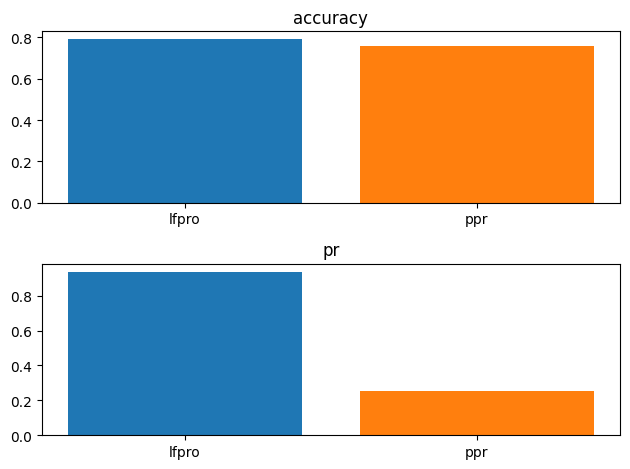

In [10]:
compare = fb.Fork(ppr=report, lfpro=fair_report)
compare = fb.extract(accuracy=compare.min, pr=compare.minratio)
fb.visualize(compare)

## Cheatsheet on report manipulation

### Fork.branch1 ...
Get a view of the fork's branch, if it exists. If it is a fork of forks, `branch1` can be the name of an internal fork branch.

### Fork.attr
If `attr` is not a fork branch, this creates a new fork with each branch values the namesake attribute obtained from respective branches. This lets forks overload operations of their branch values, e.g. can call `fork.sum()` if each branch is a numpy array.

### fb.extract
Get entries from forks of dicts. All forks should have the same branches. <br>
**Example**: Use when gathering measure values from a fork of forks of dicts.

### fb.combine
Create a fork that creates a super-fork whose branches are a collection of all individual fork branches.<br>
**Example**: Use to add more columns to a fork of dicts.

### dictionary combination |
Applies dictionary combination to all branches between forks (the forks should have the same branch names).<br>
**Example**: Use to combine reports with the same branches but different metrics.

### fb.reduce
Reduce all branches to one with an appropriate procedure. <br>
If the fork has dictionary branches, these should have identical key sets. <br>
The result will also have the same key set.
*If `name=None` is provided, the result will be a raw tensor instead.*
**Example**: Aggregate all branch results into one greater result.